# Demo: Classification

In [24]:
#Load datasets, as same as lecture 2
from sklearn.datasets import load_wine
wine = load_wine()

import pandas as pd

#Create dataframe for features
df = pd.DataFrame(wine.data,
                  columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                            'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                            'Proanthocyanins', 'Color intensity', 'Hue',
                            'OD280/OD315 of diluted wines', 'Proline']) 

df['targets'] = pd.DataFrame(wine.target)

# Get features and targets from a dataframe 
X = df.iloc[:,:13]
y = df['targets']

#Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [2]:
# Linear support venctor machine
from sklearn.svm import LinearSVC

lin_SVC = LinearSVC(C=0.1, random_state=0)
lin_SVC.fit(X_train,y_train)

predictions = lin_SVC.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[15  1  0]
 [ 0 20  1]
 [ 0  0  8]]


In [3]:
# Accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

lin_SVC_accuracy_score = accuracy_score(y_test, predictions)
lin_SVC_precision_score = precision_score(y_test, predictions, average=None)
lin_SVC_recall_score = recall_score(y_test, predictions, average=None)

print(lin_SVC_accuracy_score)
print(lin_SVC_precision_score)
print(lin_SVC_recall_score)

0.9555555555555556
[1.         0.95238095 0.88888889]
[0.9375     0.95238095 1.        ]


In [4]:
# F1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        16
          1       0.95      0.95      0.95        21
          2       0.89      1.00      0.94         8

avg / total       0.96      0.96      0.96        45



In [5]:
# RBF support vector machine
from sklearn.svm import SVC

rbf_SVC = SVC(kernel='rbf', 
              C=100000,
              gamma=1e-7, 
              random_state=0)

rbf_SVC.fit(X_train,y_train)

predictions = rbf_SVC.predict(X_test)

print("confusion matrix: \n", confusion_matrix(y_test, predictions))
print("\n")

rbf_SVC_accuracy_score = accuracy_score(y_test, predictions)
rbf_SVC_precision_score = precision_score(y_test, predictions, average=None)
rbf_SVC_recall_score = recall_score(y_test, predictions, average=None)

print("accuracy: {}\nprecision score: {}\nrecall score: {}".format(rbf_SVC_accuracy_score, rbf_SVC_precision_score, rbf_SVC_recall_score))
print("\n")
print("classification report:\n", classification_report(y_test, predictions))

confusion matrix: 
 [[15  1  0]
 [ 0 21  0]
 [ 0  0  8]]


accuracy: 0.9777777777777777
precision score: [1.         0.95454545 1.        ]
recall score: [0.9375 1.     1.    ]


classification report:
              precision    recall  f1-score   support

          0       1.00      0.94      0.97        16
          1       0.95      1.00      0.98        21
          2       1.00      1.00      1.00         8

avg / total       0.98      0.98      0.98        45



In [6]:
#Grid search and cross validation
from sklearn.svm import SVC
RBF_SVC = SVC()

#Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],  
              'gamma': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.1]
             }

grid_search = GridSearchCV(estimator = RBF_SVC,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

#here is the best accuracy
print(best_accuracy)
print(best_parameters)

0.9624060150375939
{'C': 100000, 'gamma': 1e-07}


In [7]:
# Naive Bayesian
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[16  0  0]
 [ 2 18  1]
 [ 0  0  8]]


In [8]:
# Decision tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[15  1  0]
 [ 1 19  1]
 [ 0  0  8]]


In [25]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[16  0  0]
 [ 2 18  1]
 [ 0  0  8]]


In [10]:
# Gradient Boosting Decision Tree
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


# Demo: Regression

In [11]:
#Load dataset
from sklearn.datasets import load_boston
boston = load_boston()

df_bos = pd.DataFrame(boston.data)

df_bos.columns = boston.feature_names
df_bos['PRICE'] = boston.target

df_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# Train test split
X = df_bos.drop('PRICE', axis=1)
y = df_bos['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [13]:
# Linear regression model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

Text(0.5,1,'Prices vs Predicted prices')

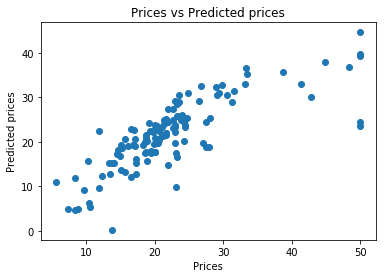

In [14]:
# Visualize result using matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

29.79055916423856


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6353620786674614

In [17]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test, y_pred)
print(mse)

3.669217386602824


In [18]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

36.64110208622719
0.5515110936187516
4.030452183377584


In [19]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

30.51363272936754
0.6265116223767435
3.6660854067905686


In [20]:
#Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.01, 0.1, 1, 10, 100, ]}

grid_search = GridSearchCV(estimator =ridge,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

#here is the best accuracy
print(best_accuracy)
print(best_parameters)

0.7170203454667449
{'alpha': 0.01}


In [21]:
#Support vector regression
from sklearn.svm import SVR
svr = SVR(kernel='rbf', 
          C=1, 
          gamma=0.1)

svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

81.711030016073
-0.00014705903097733675
5.975683955601893


In [22]:
# Decision tree regression
from sklearn.tree import DecisionTreeRegressor  
dt = DecisionTreeRegressor()  

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

28.76362204724409
0.6479318399000604
3.283464566929133


In [23]:
# Gradient Boosting Decision Tree regression
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

22.831828206837546
0.7205372906341129
2.877346309873172
